In [13]:
!pip install pandas

  Using cached pandas-2.0.1-cp311-cp311-win_amd64.whl (10.6 MB)



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from db_conn import connect

In [2]:
def messagesPerDay():
    conn = connect()

    query = '''SELECT strftime('%Y-%m', date) AS month, COUNT(*) as message_count
                FROM message
                WHERE month >= '1997-01' AND month <= '2002-12'
                GROUP BY month'''
    
    df = pd.read_sql_query(query, conn)

    month = df['month']
    count = df['message_count']

    plt.figure(figsize=(50,15))
    plt.title("Total Messages per Month")
    plt.ylabel("Messages")
    plt.xlabel("Month")
    plt.plot(month, count)
    plt.show()

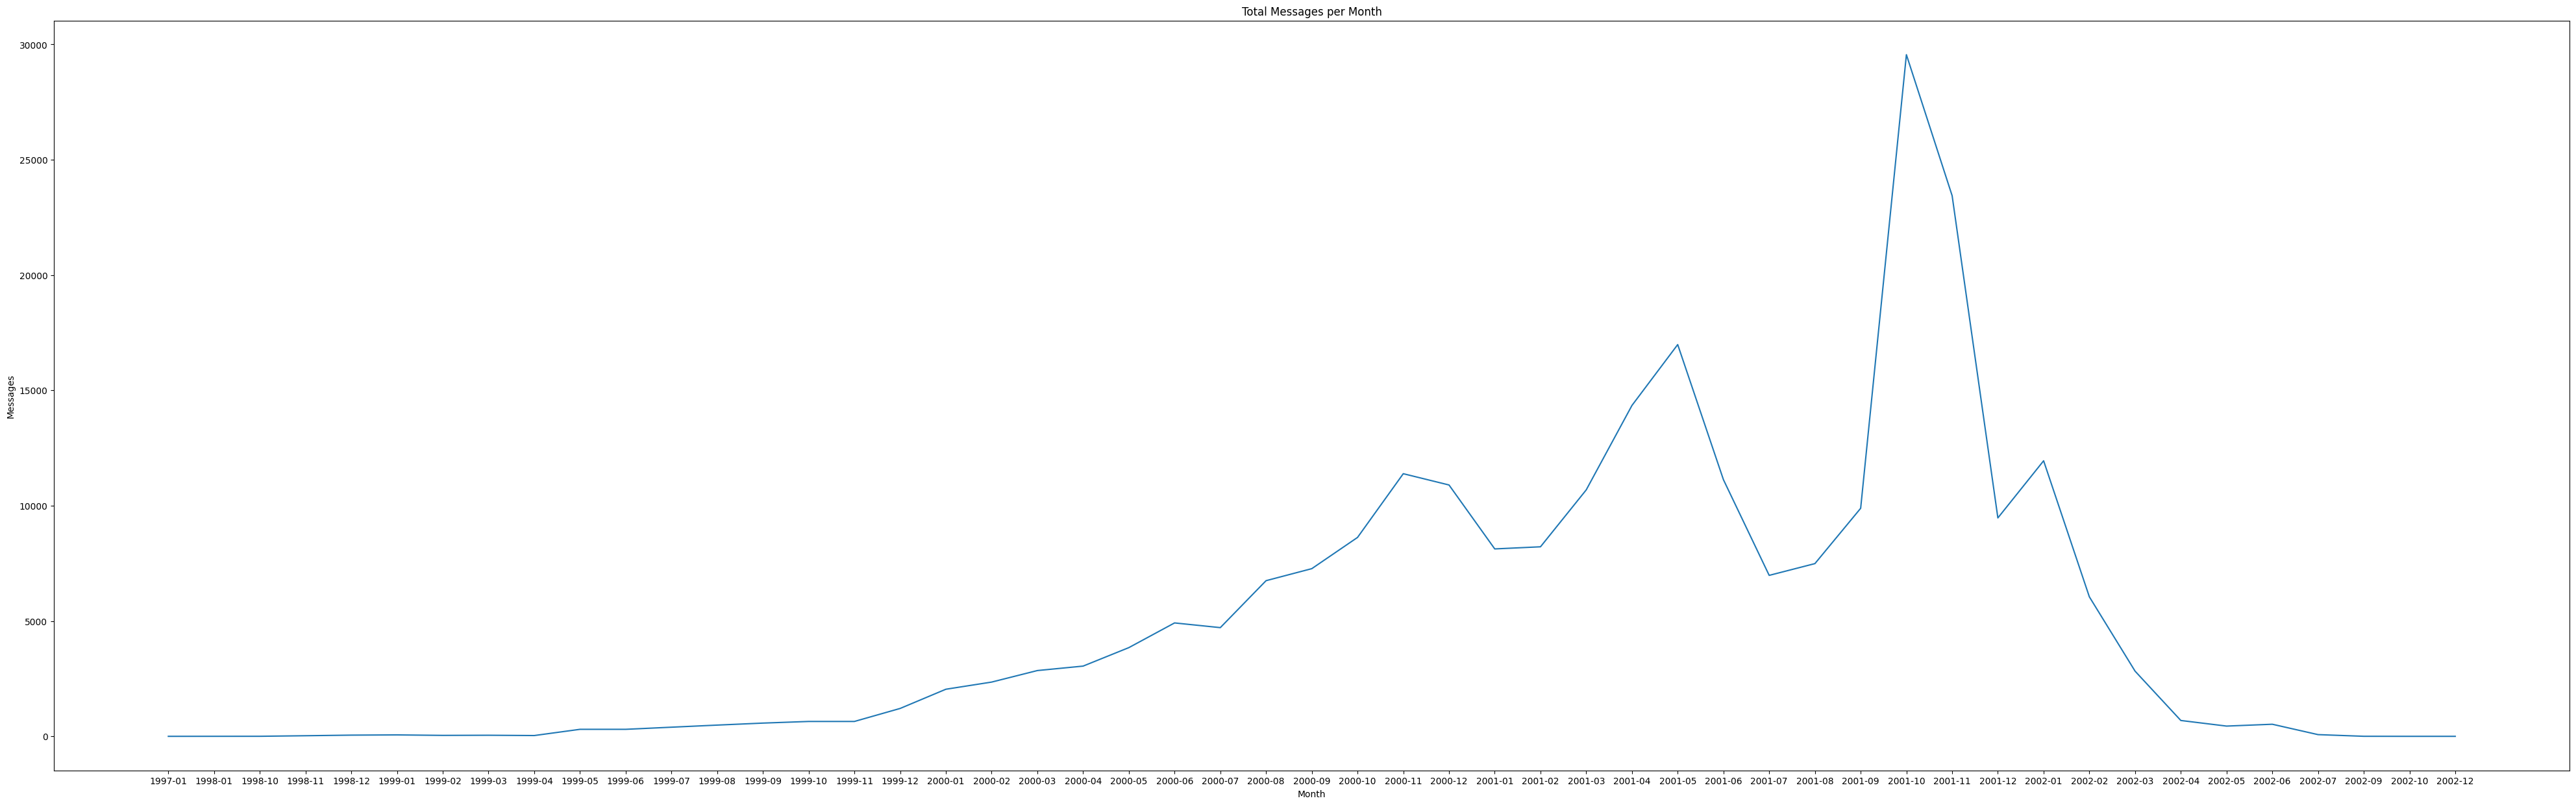

In [3]:
messagesPerDay()

In [32]:
def topSenders():
    conn = connect()

    query = '''SELECT strftime('%Y-%m', date) AS month, COUNT(mid) as count, sender
FROM message
WHERE month >= '1997-01' AND month <= '2002-12'
GROUP BY sender
ORDER BY count DESC
LIMIT 10'''
    
    df = pd.read_sql_query(query, conn)

    sender = df['sender']
    count = df['count']

    sender = sender[::-1]
    count = count[::-1]

    plt.title("Top 10 Senders")
    plt.ylabel("Sender")
    plt.xlabel("Emails")
    plt.barh(sender, count)
    for i, v in enumerate(count):
        plt.text(v, i, str(v), ha='right', va='center')
    plt.show()

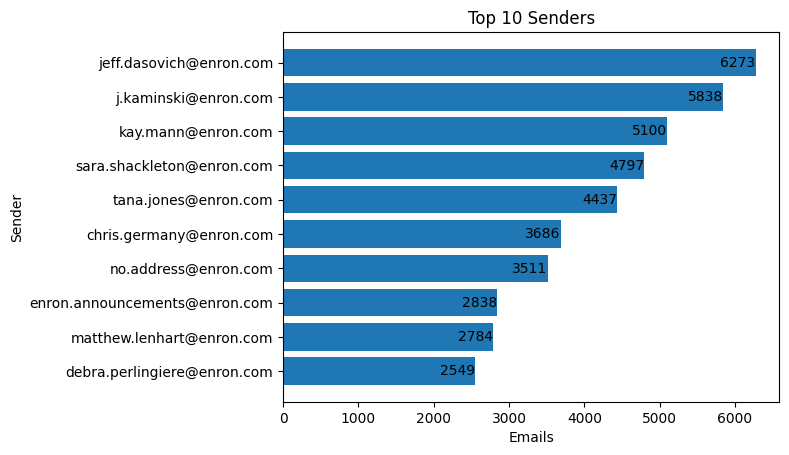

In [33]:
topSenders()

In [30]:
def topRecipients():
    conn = connect()

    query = '''SELECT COUNT(rid) as count, rvalue
FROM recipientinfo
GROUP BY rvalue
ORDER BY count DESC
LIMIT 10'''
    
    df = pd.read_sql_query(query, conn)

    recipient = df['rvalue']
    count = df['count']

    recipient = recipient[::-1]
    count = count[::-1]

    plt.title("Top 10 Recipients")
    plt.ylabel("Recipient")
    plt.xlabel("Emails")
    plt.barh(recipient, count)
    for i, v in enumerate(count):
        plt.text(v, i, str(v), ha='right', va='center')
    plt.show()

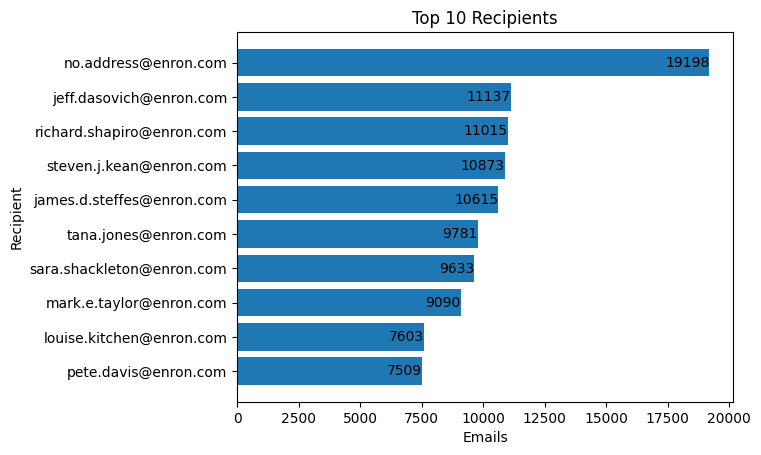

In [31]:
topRecipients()

In [34]:
def typeDis():
    conn = connect()

    query = '''SELECT COUNT(rtype) as count, rtype
FROM recipientinfo
GROUP BY rtype'''
    
    df = pd.read_sql_query(query, conn)

    rtype = df['rtype']
    count = df['count']

    plt.title("Email Type Distribution")
    plt.axis('equal')
    plt.pie(count, labels=rtype, autopct='%1.1f%%')
    plt.show()

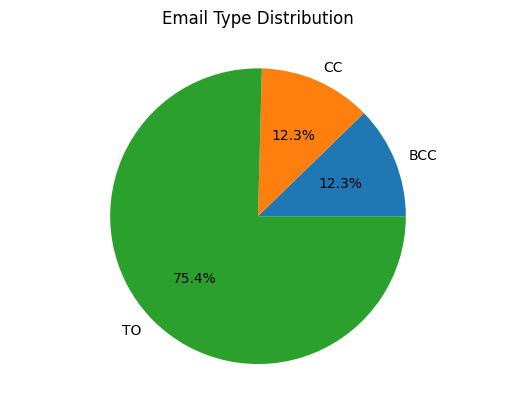

In [35]:
typeDis()

In [42]:
def extAndInt():
    conn = connect()

    query = '''SELECT SUM(CASE WHEN e.eid IS NULL THEN 1 ELSE 0 END) as external, SUM(CASE WHEN e.eid IS NOT NULL THEN 1 ELSE 0 END) as internal
FROM recipientinfo as ri
JOIN message as m ON m.mid = ri.mid
JOIN employeelist as e2 ON e2.Email_id = m.sender
LEFT JOIN employeelist as e ON e.Email_id = ri.rvalue'''
    
    df = pd.read_sql_query(query, conn)

    type = ['Internal', 'External']
    count = [int(df['internal'].iloc[0]), int(df['external'].iloc[0])]
    print(count)

    plt.title("Email Type Distribution")
    plt.axis('equal')
    plt.pie(count, labels=type, autopct='%1.1f%%')
    plt.show()

[69407, 313443]


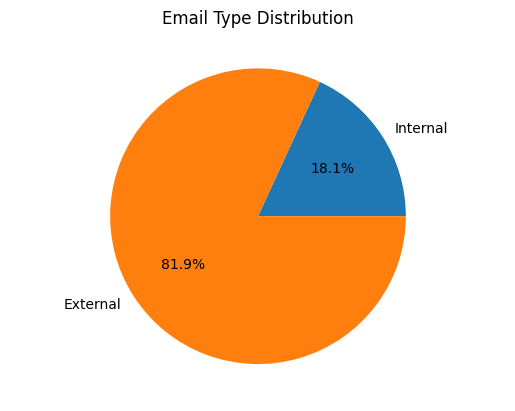

In [43]:
extAndInt()